In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

merged_df = pd.merge(city_df, ride_df, on='city', how='outer')

# Reorder the columns
merged_df = merged_df[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]


# Display the data table for preview

merged_df.head()



,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [1]:
# NO CODE HERE!

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

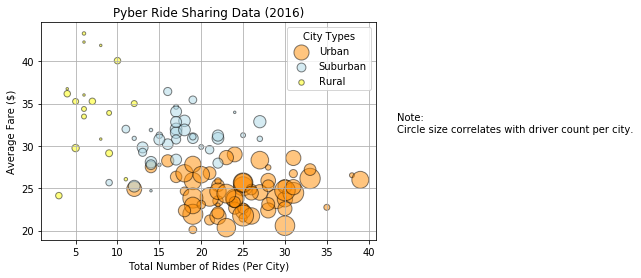

In [9]:
# Obtain the x and y coordinates for each of the three city types

urban = merged_df.loc[merged_df['type'] == "Urban" , :]
suburban = merged_df.loc[merged_df['type'] == "Suburban" , :]
rural = merged_df.loc[merged_df['type'] == "Rural" , :]



# Create urban X coords
urban_x = urban[['city', 'ride_id']].groupby(['city'])
rider_count = urban_x['ride_id'].count()
ubn_x = urban[['city', 'driver_count']]
ubn_xx = ubn_x.drop_duplicates(subset=['city'], keep='first')
urban_rider = rider_count.to_frame()

# Create urban Y coords
urban_y = urban[['city', 'fare']].groupby(['city'])
avg_fare = urban_y['fare'].mean()
urban_avg_fare = avg_fare.to_frame()

urban_df = pd.merge(urban_rider, urban_avg_fare, on='city', how='outer')
urban_df = pd.merge(urban_df, ubn_xx, on='city', how='outer')



# Create suburban X coords
suburban_x = suburban[['city', 'ride_id']].groupby(['city'])
rider_count = suburban_x['ride_id'].count()
sub_x = suburban[['city', 'driver_count']]
sub_xx = sub_x.drop_duplicates(subset=['city'], keep='first')
suburban_rider = rider_count.to_frame()

# Create suburban Y coords
suburban_y = suburban[['city', 'fare']].groupby(['city'])
avg_fare = suburban_y['fare'].mean()
suburban_avg_fare = avg_fare.to_frame()

suburban_df = pd.merge(suburban_rider, suburban_avg_fare, on='city', how='outer')
suburban_df = pd.merge(suburban_df, sub_xx, on='city', how='outer')

# Create rural X coords
rural_x = rural[['city', 'ride_id']].groupby(['city'])
rider_count = rural_x['ride_id'].count()
rur_x = rural[['city', 'driver_count']]
rur_xx = rur_x.drop_duplicates(subset=['city'], keep='first')
rural_rider = rider_count.to_frame()

# Create rural Y coords
rural_y = rural[['city', 'fare']].groupby(['city'])
avg_fare = rural_y['fare'].mean()
rural_avg_fare = avg_fare.to_frame()

rural_df = pd.merge(rural_rider, rural_avg_fare, on='city', how='outer')
rural_df = pd.merge(rural_df, rur_xx, on='city', how='outer')






# # # Build the scatter plots for each city types

Urban_plot = plt.scatter(urban_df['ride_id'], urban_df['fare'], marker="o", facecolors="darkorange", edgecolors="black",
                           label="Urban", s=(urban_df['driver_count'] * 6), alpha=0.50)

Suburban_plot = plt.scatter(suburban_df['ride_id'], suburban_df['fare'], marker="o", facecolors="lightblue", edgecolors="black",
                             label="Suburban", s=(suburban_df['driver_count'] * 6), alpha=0.50)

Rural_plot = plt.scatter(rural_df['ride_id'], rural_df['fare'], marker="o", facecolors="yellow", edgecolors="black",
                         label="Rural", s=(rural_df['driver_count'] * 6), alpha=0.50)



# Incorporate a text label regarding circle size
note = """Note:
Circle size correlates with driver count per city."""

plt.gcf().text(0.95, 0.5, note, fontsize=10)


# # Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()


# Create a legend

plt.legend(handles=[Urban_plot,Suburban_plot,Rural_plot], loc="best", title="City Types")



# Save Figure
# plt.savefig("Pyber_bubble_plot.png")

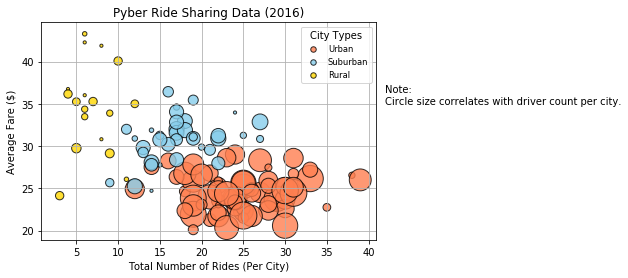

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

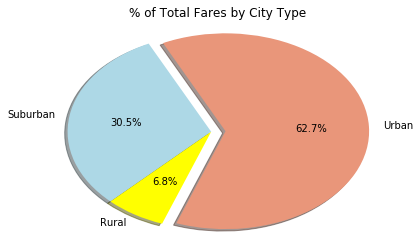

In [15]:
# Calculate Type Percents


total_fares_df = merged_df[['city', 'fare', 'type']].groupby(['city'])
types_df = merged_df[['city', 'type']]
fares = total_fares_df[['fare']].sum()

blah_df = pd.merge(fares,types_df, on='city', how='outer')
blah_df = blah_df.drop_duplicates(subset=['city'], keep='first')


sum_fares = blah_df['fare'].sum()

urban_fares_df = blah_df.loc[blah_df['type'] == "Urban" , :]
urban_fares = urban_fares_df['fare'].sum()
urban_fares_percent = (urban_fares / sum_fares) * 100

suburban_fares_df = blah_df.loc[blah_df['type'] == "Suburban" , :]
suburban_fares = suburban_fares_df['fare'].sum()
suburban_fares_percent = (suburban_fares / sum_fares) * 100


rural_fares_df = blah_df.loc[blah_df['type'] == "Rural" , :]
rural_fares = rural_fares_df['fare'].sum()
rural_fares_percent = (rural_fares / sum_fares) * 100

citylabels = ["Urban", "Suburban", "Rural"]
fare_percents = [urban_fares_percent, suburban_fares_percent, rural_fares_percent]
colors = ["darksalmon", "lightblue", "yellow"]
explode = [0.1, 0, 0]
# Build Pie Chart

plt.pie(fare_percents, labels=citylabels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=250)

plt.axis("auto")
plt.title("% of Total Fares by City Type")
# Save Figure


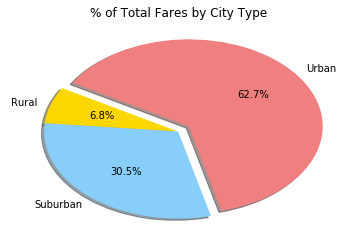

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5,1,'% of Total Drivers by City Type')

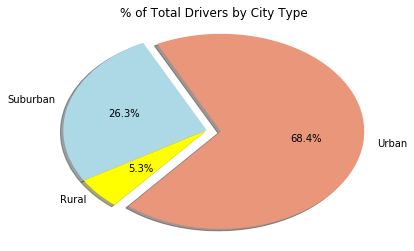

In [12]:
# Calculate Ride Percents

# Total
Total = merged_df['type'].count()

# Urban Total
urban_total = urban['type'].count()
urban_percent = urban_total / Total


# Suburban Total
suburban_total = suburban['type'].count()
suburban_percent = suburban_total / Total

# Rural Total
rural_total = rural['type'].count()
rural_percent = rural_total / Total




# Build Pie Chart

total_riders = [urban_percent, suburban_percent, rural_percent]


plt.pie(total_riders, labels=citylabels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=230)

plt.axis("auto")

plt.title("% of Total Drivers by City Type")



# Save Figure


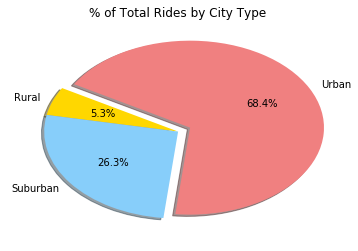

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

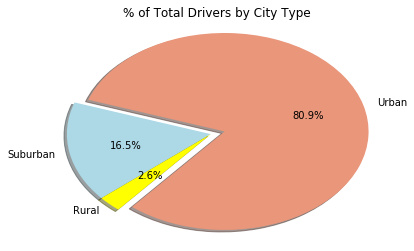

In [14]:
# Calculate Driver Percents


urban = urban.drop_duplicates(subset=['city'])
urban_drivers = urban['driver_count'].sum()

suburban = suburban.drop_duplicates(subset=['city'])
suburban_drivers = suburban['driver_count'].sum()

rural = rural.drop_duplicates(subset=['city'])
rural_drivers = rural['driver_count'].sum()


total_drivers = urban_drivers + suburban_drivers + rural_drivers


# Find percentages for each city type
urban_driver_percent = (urban_drivers / total_drivers) * 100
suburban_driver_percent = (suburban_drivers / total_drivers) * 100
rural_driver_percent = (rural_drivers / total_drivers) * 100




# Build Pie Charts
# City Labels, Explode, and Colors defined in previous pie chart code

total_drivers = [urban_driver_percent, suburban_driver_percent, rural_driver_percent]


plt.pie(total_drivers, labels=citylabels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=230)

plt.axis("auto")

plt.title("% of Total Drivers by City Type")

# Save Figure


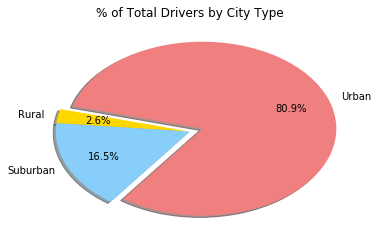

In [6]:
# Show Figure
plt.show()